In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv("../../data/processed/dataset_variables_finales.csv", encoding="utf-8", delimiter=",")
df.head()

,precio,matrícula particular pagado 2024,superficie_total,simce 4to básico lectura 2022,superficie_construida,banos,longitud,simce 4to básico matemáticas 2022,distancia_metro,latitud,...,ingreso_promedio,dormitorios,extranjeros 2025 (%),pobreza multidimensional 2022 (%),pobreza por ingresos 2022 (%),hogares hacinados 2025 (%),trabajadores_información_comunicaciones_2023,trabajadores_financieras_seguros_2023,matrícula subvencionada 2024,empresas_otras_actividades_2023
0,322633576.0,6810.0,404.0,285.0,275.0,3.0,-70.678398,274.0,2554.229150,-33.345468,...,720051.66,5.0,6.4,18.6,4.3,8.8,16518.0,3273.0,4724.0,487.0
1,157180460.0,4221.0,190.0,279.0,127.0,2.0,-70.559425,268.0,2324.734493,-33.563025,...,538232.86,3.0,3.6,18.9,5.0,7.2,658.0,75.0,84429.0,1922.0
2,133544301.0,3215.0,146.0,273.0,61.0,2.0,-70.689872,258.0,11151.846959,-33.641678,...,488733.18,5.0,5.4,18.7,6.0,9.0,498.0,88.0,38599.0,843.0
3,117786861.0,769.0,145.0,273.0,82.0,2.0,-70.887450,256.0,16662.321199,-33.613778,...,591753.35,3.0,3.0,15.1,7.3,8.1,93.0,19.0,12798.0,299.0
4,153241100.0,2732.0,172.0,283.0,82.0,4.0,-70.709209,269.0,1948.472205,-33.360659,...,549642.87,4.0,13.0,17.0,5.2,8.7,861.0,367.0,33726.0,660.0


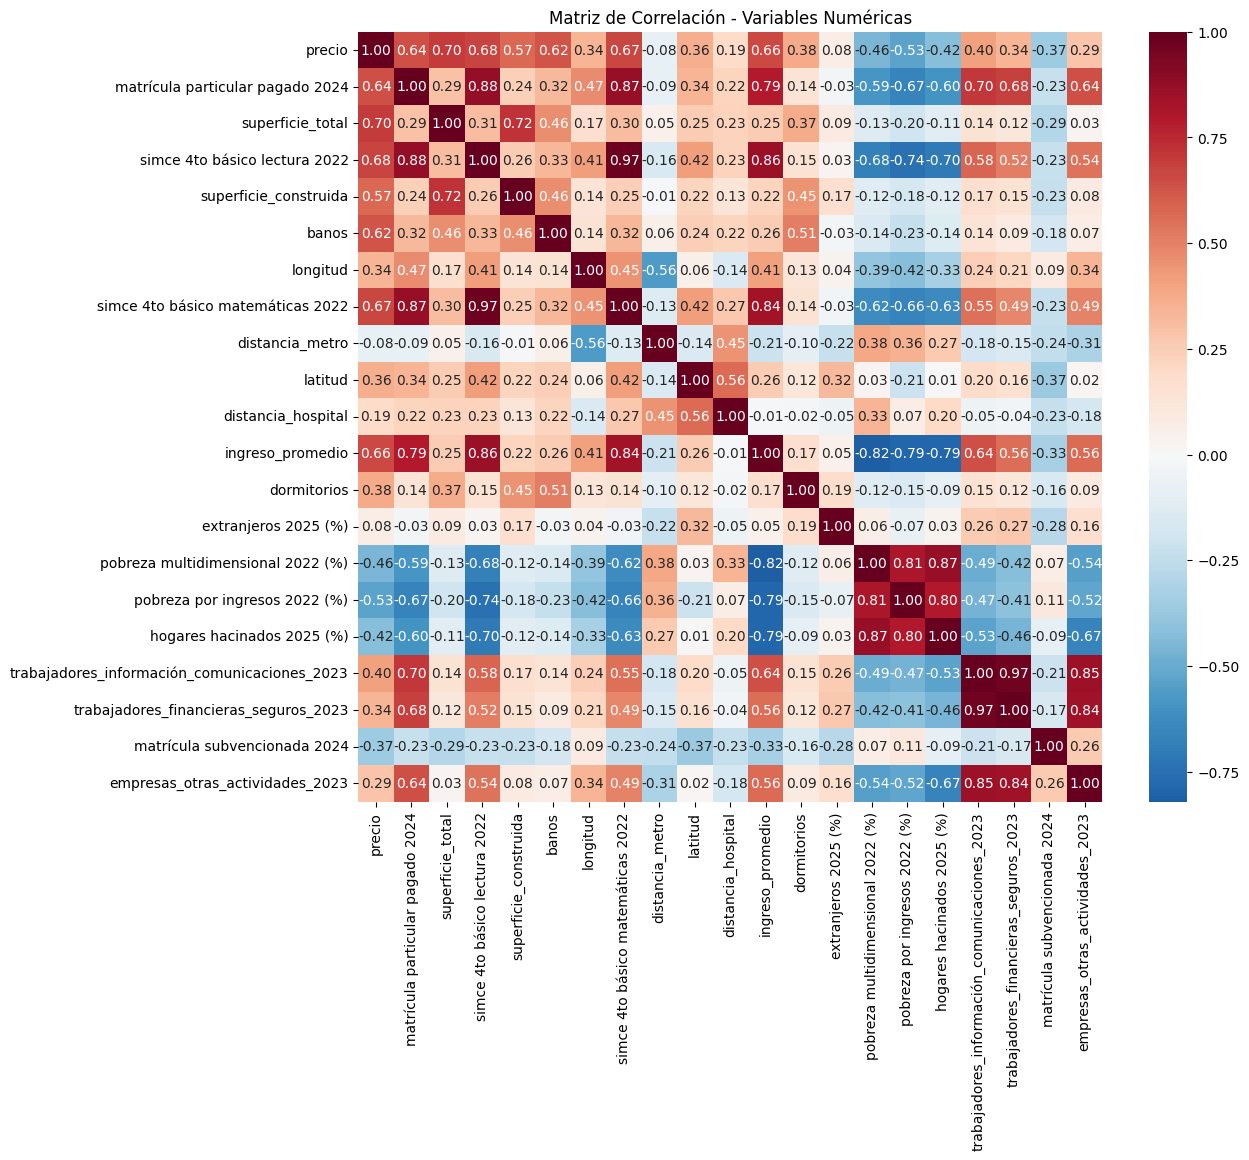

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Visualización
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.2f')
plt.title('Matriz de Correlación - Variables Numéricas')
plt.show()

In [6]:
print(df.columns)

Index(['precio', 'matrícula particular pagado 2024', 'superficie_total',
       'simce 4to básico lectura 2022', 'superficie_construida', 'banos',
       'longitud', 'simce 4to básico matemáticas 2022', 'distancia_metro',
       'latitud', 'distancia_hospital', 'ingreso_promedio', 'dormitorios',
       'extranjeros 2025 (%)', 'pobreza multidimensional 2022 (%)',
       'pobreza por ingresos 2022 (%)', 'hogares hacinados 2025 (%)',
       'trabajadores_información_comunicaciones_2023',
       'trabajadores_financieras_seguros_2023', 'matrícula subvencionada 2024',
       'empresas_otras_actividades_2023'],
      dtype='object')


In [7]:
variables_a_eliminar = [
    'empresas_otras_actividades_2023',
    'simce 4to básico lectura 2022',
    'distancia_metro',
    'matrícula particular pagado 2024',
    'simce 4to básico lectura 2022',
    'trabajadores_información_comunicaciones_2023',
    'simce 4to básico matemáticas 2022',
    'hogares hacinados 2025 (%)',
    'pobreza por ingresos 2022 (%)',
    'pobreza multidimensional 2022 (%)'
]


df = df.drop(variables_a_eliminar, axis=1)
df.columns

Index(['precio', 'superficie_total', 'superficie_construida', 'banos',
       'longitud', 'latitud', 'distancia_hospital', 'ingreso_promedio',
       'dormitorios', 'extranjeros 2025 (%)',
       'trabajadores_financieras_seguros_2023',
       'matrícula subvencionada 2024'],
      dtype='object')

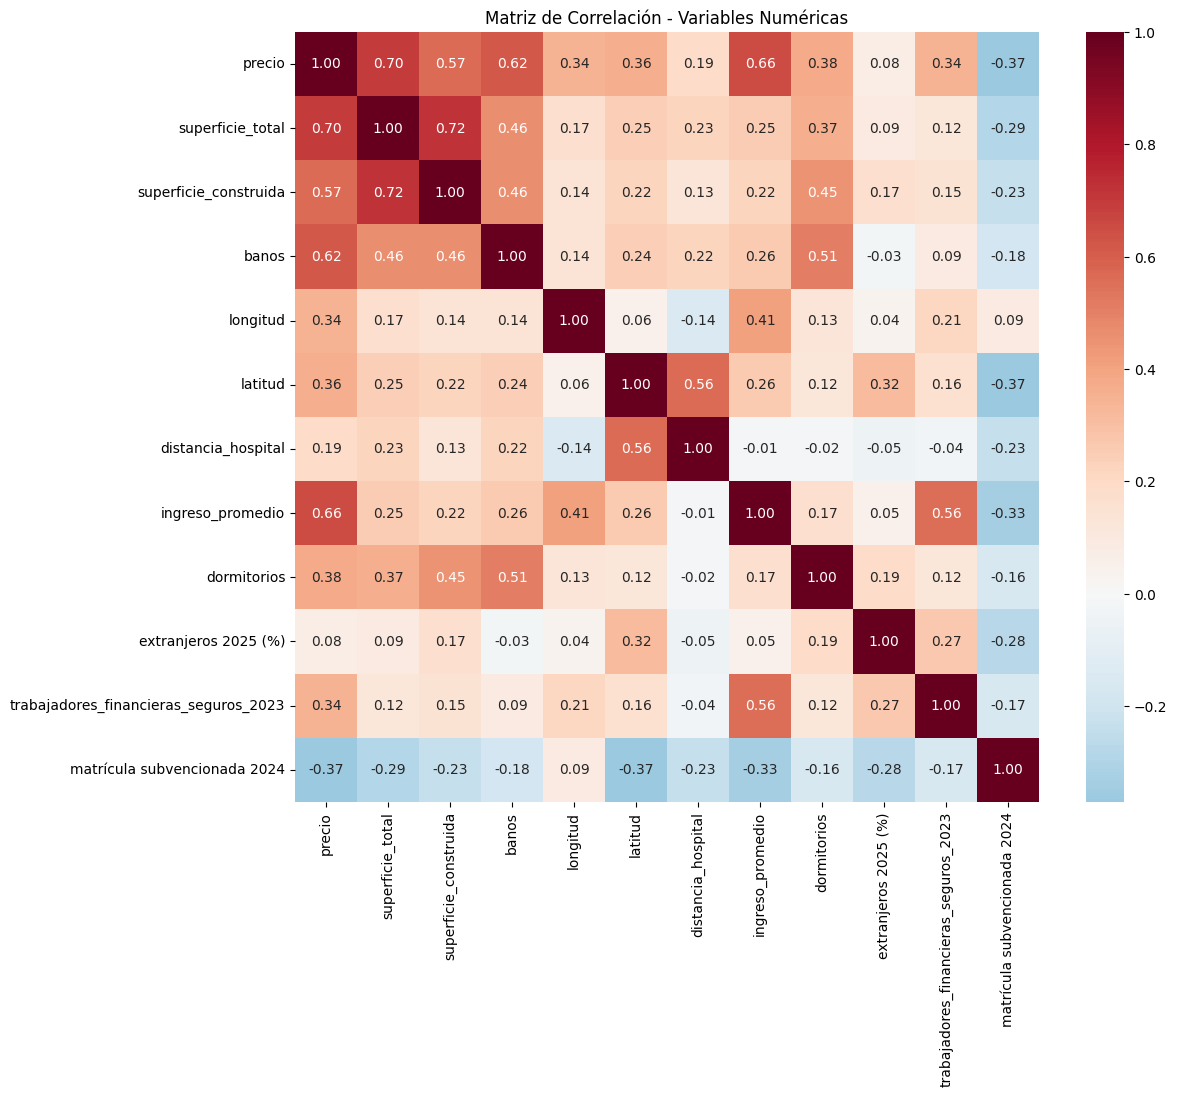

In [8]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.2f')
plt.title('Matriz de Correlación - Variables Numéricas')
plt.show()

In [9]:
df = df.dropna()

In [10]:
len(df)

4508

In [11]:
df.columns

Index(['precio', 'superficie_total', 'superficie_construida', 'banos',
       'longitud', 'latitud', 'distancia_hospital', 'ingreso_promedio',
       'dormitorios', 'extranjeros 2025 (%)',
       'trabajadores_financieras_seguros_2023',
       'matrícula subvencionada 2024'],
      dtype='object')

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
y = np.log(df['precio']) 
X = df.drop(columns=['precio'])

y_binned = pd.qcut(y, q=10, duplicates='drop')
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_binned
)

print(f"Tamaño conjunto entrenamiento: {X_train.shape}")
print(f"Tamaño conjunto prueba: {X_test.shape}")

Tamaño conjunto entrenamiento: (3606, 11)
Tamaño conjunto prueba: (902, 11)


In [14]:
def calculate_metrics(y_true, y_pred):
    """Calcula todas las métricas requeridas"""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    mae_percentage = (mae / y_true.mean()) * 100
    
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    return {
        'MAE': mae,
        'MAE_%': mae_percentage,
        'RMSE': rmse,
        'R²': r2,
        'MAPE': mape
    }

In [16]:
from sklearn.model_selection import KFold
import numpy as np

def cv_log_corrected(pipeline, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    mae_scores = []
    r2_scores = []
    
    for train_idx, val_idx in kf.split(X):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
        
        y_train_log_fold = np.log1p(y_train_fold)
        pipeline.fit(X_train_fold, y_train_log_fold)
        
        y_pred_log_fold = pipeline.predict(X_val_fold)
        y_pred_original_fold = np.expm1(y_pred_log_fold)
        
        mae_scores.append(mean_absolute_error(y_val_fold, y_pred_original_fold))
        r2_scores.append(r2_score(y_val_fold, y_pred_original_fold))
    
    return np.array(mae_scores), np.array(r2_scores)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np

print("LINEAR REGRESSION")

preprocessor = StandardScaler()

lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

y_pred_lr = np.exp(y_pred_lr)
y_test_real = np.exp(y_test)

metrics_lr = calculate_metrics(y_test_real, y_pred_lr)

for metric, value in metrics_lr.items():
    if metric == 'MAE' or metric == 'RMSE':
        print(f"{metric}: ${value:,.0f} CLP")
    elif metric == 'MAE_%' or metric == 'MAPE':
        print(f"{metric}: {value:.1f}%")
    else:
        print(f"{metric}: {value:.3f}")

LINEAR REGRESSION
MAE: $54,646,711 CLP
MAE_%: 24.2%
RMSE: $97,526,756 CLP
R²: 0.663
MAPE: 25.1%


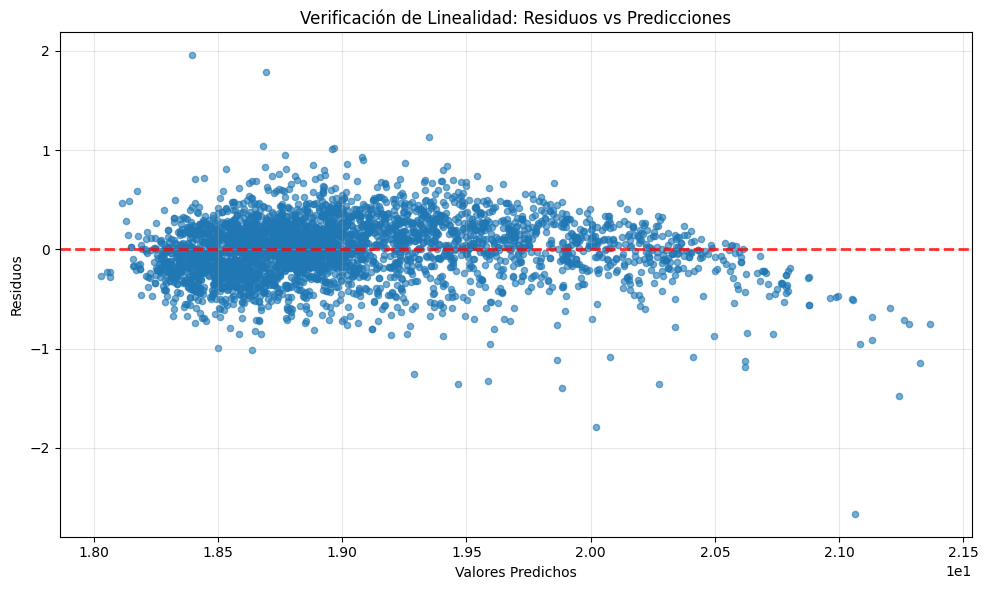


RESULTADO SUPUESTO LINEALIDAD:
Correlación predicciones-residuos: 0.0000
✅ CUMPLE: Los residuos son aleatorios (buena linealidad)

Interpretación:
- Si los puntos están distribuidos aleatoriamente alrededor de y=0: CUMPLE
- Si hay patrones (curvas, embudos): NO CUMPLE


In [18]:
y_pred = lr_pipeline.predict(X_train)
residuos = y_train - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.6, s=20)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.8, linewidth=2)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Verificación de Linealidad: Residuos vs Predicciones')
plt.grid(True, alpha=0.3)
plt.ticklabel_format(style='scientific', axis='both', scilimits=(0,0))
plt.tight_layout()
plt.show()

# Test numérico
corr_pred_resid = np.corrcoef(y_pred, residuos)[0, 1]
print(f"\nRESULTADO SUPUESTO LINEALIDAD:")
print(f"Correlación predicciones-residuos: {corr_pred_resid:.4f}")
if abs(corr_pred_resid) < 0.1:
    print("✅ CUMPLE: Los residuos son aleatorios (buena linealidad)")
elif abs(corr_pred_resid) < 0.3:
    print("⚠️ PARCIAL: Leve patrón en residuos (linealidad aceptable)")
else:
    print("❌ NO CUMPLE: Patrón sistemático en residuos (mala linealidad)")

print(f"\nInterpretación:")
print("- Si los puntos están distribuidos aleatoriamente alrededor de y=0: CUMPLE")
print("- Si hay patrones (curvas, embudos): NO CUMPLE")

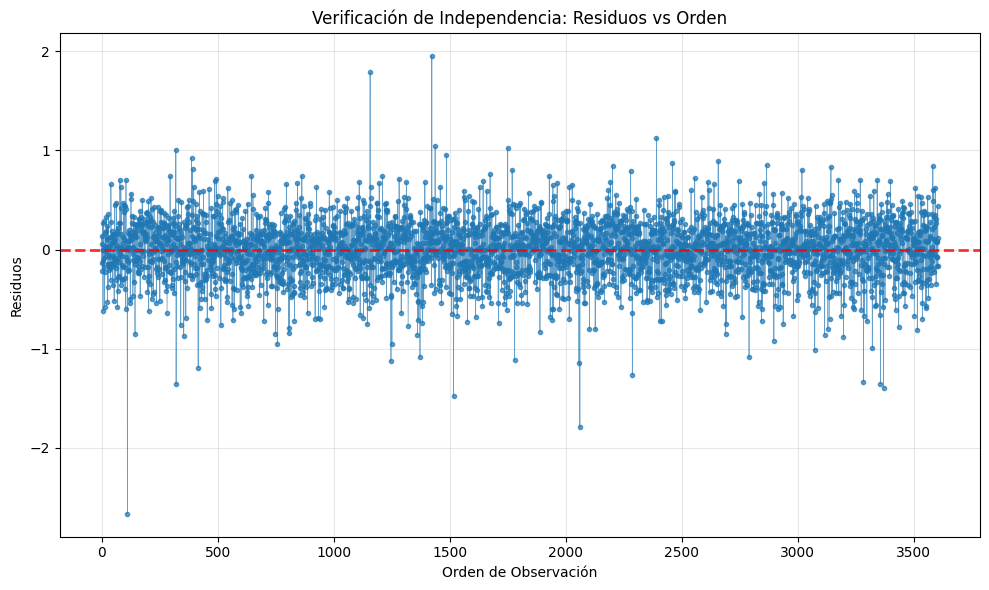


RESULTADO SUPUESTO INDEPENDENCIA:
Estadístico Durbin-Watson: 2.0282
Autocorrelación residuos (lag-1): -0.0142
✅ CUMPLE: No hay autocorrelación significativa

Interpretación:
- Durbin-Watson cerca de 2.0 = buena independencia
- Autocorrelación cerca de 0 = buena independencia
- Si hay tendencias en el gráfico: problemas de independencia


In [19]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(residuos)), residuos, marker='o', markersize=3, alpha=0.7, linewidth=0.5)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.8, linewidth=2)
plt.xlabel('Orden de Observación')
plt.ylabel('Residuos')
plt.title('Verificación de Independencia: Residuos vs Orden')
plt.grid(True, alpha=0.3)
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
plt.tight_layout()
plt.show()

# Test de Durbin-Watson (aproximado)
diff_residuos = np.diff(residuos)
dw_stat = np.sum(diff_residuos**2) / np.sum(residuos**2)

# Autocorrelación de residuos (lag 1)
autocorr = np.corrcoef(residuos[:-1], residuos[1:])[0, 1]

print(f"\nRESULTADO SUPUESTO INDEPENDENCIA:")
print(f"Estadístico Durbin-Watson: {dw_stat:.4f}")
print(f"Autocorrelación residuos (lag-1): {autocorr:.4f}")

if 1.5 <= dw_stat <= 2.5 and abs(autocorr) < 0.2:
    print("✅ CUMPLE: No hay autocorrelación significativa")
elif 1.2 <= dw_stat <= 2.8 and abs(autocorr) < 0.4:
    print("⚠️ PARCIAL: Autocorrelación leve pero aceptable")
else:
    print("❌ NO CUMPLE: Autocorrelación significativa detectada")

print(f"\nInterpretación:")
print("- Durbin-Watson cerca de 2.0 = buena independencia")
print("- Autocorrelación cerca de 0 = buena independencia")
print("- Si hay tendencias en el gráfico: problemas de independencia")

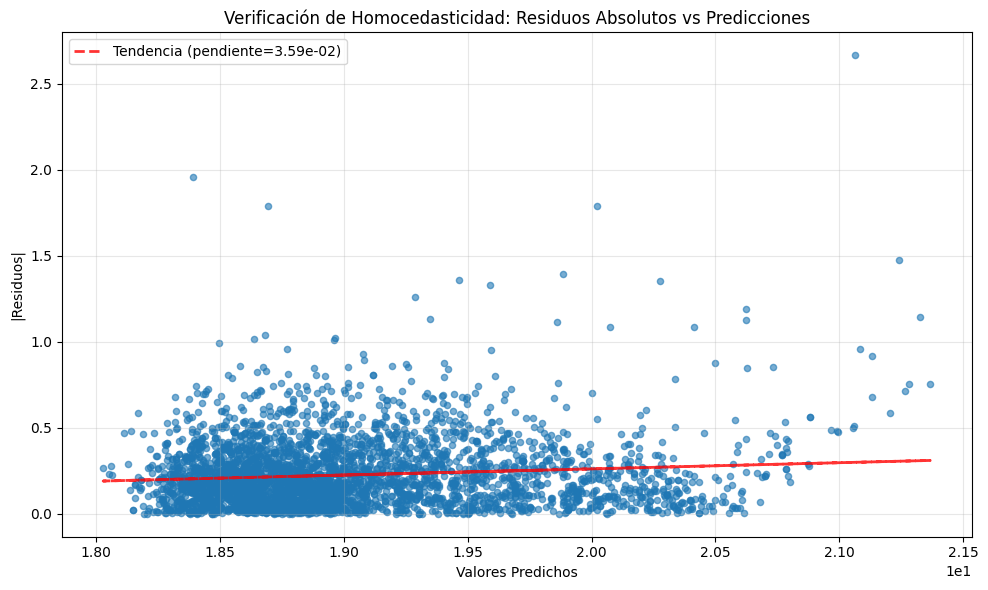


RESULTADO SUPUESTO HOMOCEDASTICIDAD:
Correlación predicciones-residuos²: 0.1212
Razón varianzas (Q3/Q1): 1.8171
Pendiente tendencia residuos: 3.5870e-02
✅ CUMPLE: Varianza constante (homocedasticidad)

Interpretación:
- Puntos dispersos horizontalmente = homocedasticidad
- Forma de embudo o cono = heterocedasticidad
- Razón de varianzas cercana a 1 = varianza constante


In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, np.abs(residuos), alpha=0.6, s=20)
plt.xlabel('Valores Predichos')
plt.ylabel('|Residuos|')
plt.title('Verificación de Homocedasticidad: Residuos Absolutos vs Predicciones')
plt.grid(True, alpha=0.3)
plt.ticklabel_format(style='scientific', axis='both', scilimits=(0,0))

# Línea de tendencia para detectar heterocedasticidad
z = np.polyfit(y_pred, np.abs(residuos), 1)
p = np.poly1d(z)
plt.plot(y_pred, p(y_pred), "r--", alpha=0.8, linewidth=2, label=f'Tendencia (pendiente={z[0]:.2e})')
plt.legend()
plt.tight_layout()
plt.show()

# Test de Breusch-Pagan simplificado
# Correlación entre predicciones y residuos al cuadrado
corr_pred_resid_sq = np.corrcoef(y_pred, residuos**2)[0, 1]

# Razón de varianzas (cuartiles)
q1_idx = int(len(y_pred) * 0.25)
q3_idx = int(len(y_pred) * 0.75)
sorted_idx = np.argsort(y_pred)
var_q1 = np.var(residuos.iloc[sorted_idx[:q1_idx]])
var_q3 = np.var(residuos.iloc[sorted_idx[q3_idx:]])
razon_varianzas = var_q3 / var_q1 if var_q1 > 0 else float('inf')

print(f"\nRESULTADO SUPUESTO HOMOCEDASTICIDAD:")
print(f"Correlación predicciones-residuos²: {corr_pred_resid_sq:.4f}")
print(f"Razón varianzas (Q3/Q1): {razon_varianzas:.4f}")
print(f"Pendiente tendencia residuos: {z[0]:.4e}")

if abs(corr_pred_resid_sq) < 0.2 and 0.5 <= razon_varianzas <= 2.0:
    print("✅ CUMPLE: Varianza constante (homocedasticidad)")
elif abs(corr_pred_resid_sq) < 0.4 and 0.25 <= razon_varianzas <= 4.0:
    print("⚠️ PARCIAL: Leve heterocedasticidad pero aceptable")
else:
    print("❌ NO CUMPLE: Heterocedasticidad significativa")

print(f"\nInterpretación:")
print("- Puntos dispersos horizontalmente = homocedasticidad")
print("- Forma de embudo o cono = heterocedasticidad")
print("- Razón de varianzas cercana a 1 = varianza constante")

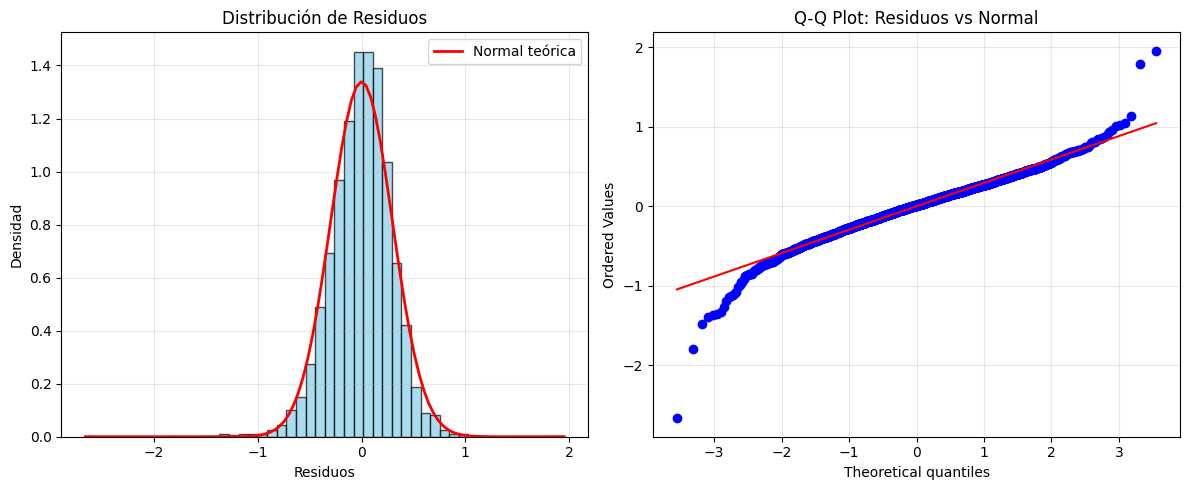


RESULTADO SUPUESTO NORMALIDAD:
Media residuos: 1.8936e-15
Desv. estándar: 2.9806e-01
Asimetría (skewness): -0.4285
Curtosis (kurtosis): 3.7785

Tests estadísticos:
Jarque-Bera: estadístico=2255.4596, p-valor=0.0000
Shapiro-Wilk: estadístico=0.9739, p-valor=0.0000
Kolmogorov-Smirnov: estadístico=0.0323, p-valor=0.0011

Tests pasados: 0/3
❌ NO CUMPLE: Residuos no siguen distribución normal

Interpretación:
- p-valor > 0.05 en tests = normalidad
- Q-Q plot lineal = normalidad
- |Asimetría| < 2 y |Curtosis| < 7 = aceptable


In [21]:
from scipy import stats
from scipy.stats import jarque_bera, shapiro

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de residuos
axes[0].hist(residuos, bins=50, alpha=0.7, color='skyblue', edgecolor='black', density=True)
axes[0].set_xlabel('Residuos')
axes[0].set_ylabel('Densidad')
axes[0].set_title('Distribución de Residuos')
axes[0].grid(True, alpha=0.3)

# Superponer distribución normal teórica
mu, sigma = np.mean(residuos), np.std(residuos)
x = np.linspace(residuos.min(), residuos.max(), 100)
axes[0].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal teórica')
axes[0].legend()

# Q-Q Plot
stats.probplot(residuos, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot: Residuos vs Normal')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Tests de normalidad
# Jarque-Bera Test
jb_stat, jb_pvalue = jarque_bera(residuos)

# Shapiro-Wilk Test (para muestras pequeñas < 5000)
if len(residuos) <= 5000:
    sw_stat, sw_pvalue = shapiro(residuos)
else:
    sw_stat, sw_pvalue = None, None

# Kolmogorov-Smirnov Test
ks_stat, ks_pvalue = stats.kstest(residuos, 'norm', args=(mu, sigma))

# Estadísticas descriptivas
skewness = stats.skew(residuos)
kurtosis = stats.kurtosis(residuos)

print(f"\nRESULTADO SUPUESTO NORMALIDAD:")
print(f"Media residuos: {np.mean(residuos):.4e}")
print(f"Desv. estándar: {np.std(residuos):.4e}")
print(f"Asimetría (skewness): {skewness:.4f}")
print(f"Curtosis (kurtosis): {kurtosis:.4f}")

print(f"\nTests estadísticos:")
print(f"Jarque-Bera: estadístico={jb_stat:.4f}, p-valor={jb_pvalue:.4f}")
if sw_pvalue is not None:
    print(f"Shapiro-Wilk: estadístico={sw_stat:.4f}, p-valor={sw_pvalue:.4f}")
print(f"Kolmogorov-Smirnov: estadístico={ks_stat:.4f}, p-valor={ks_pvalue:.4f}")

# Interpretación
alpha = 0.05
tests_passed = 0
total_tests = 0

if jb_pvalue > alpha:
    tests_passed += 1
total_tests += 1

if sw_pvalue is not None:
    if sw_pvalue > alpha:
        tests_passed += 1
    total_tests += 1

if ks_pvalue > alpha:
    tests_passed += 1
total_tests += 1

print(f"\nTests pasados: {tests_passed}/{total_tests}")
if tests_passed >= total_tests * 0.5 and abs(skewness) < 2 and abs(kurtosis) < 7:
    print("✅ CUMPLE: Residuos aproximadamente normales")
elif tests_passed >= total_tests * 0.3 and abs(skewness) < 3:
    print("⚠️ PARCIAL: Desviación leve de normalidad pero aceptable")
else:
    print("❌ NO CUMPLE: Residuos no siguen distribución normal")

print(f"\nInterpretación:")
print("- p-valor > 0.05 en tests = normalidad")
print("- Q-Q plot lineal = normalidad")
print("- |Asimetría| < 2 y |Curtosis| < 7 = aceptable")

In [22]:
from sklearn.svm import SVR
import numpy as np

svm_linear = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVR(kernel='linear', C=1.0))
])

svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("=== SVM - ESCALA LOGARÍTMICA (Performance Real) ===")
metrics_log = calculate_metrics(y_test, y_pred_linear)
for metric, value in metrics_log.items():
    print(f"{metric}: {value:.3f}")

print("\n=== SVM - ESCALA REAL (Interpretabilidad) ===")
y_pred_linear_clp = np.exp(y_pred_linear)
y_test_real = np.exp(y_test)

metrics_linear = calculate_metrics(y_test_real, y_pred_linear_clp)

for metric, value in metrics_linear.items():
    if metric == 'MAE' or metric == 'RMSE':
        print(f"{metric}: ${value:,.0f} CLP")
    elif metric == 'MAE_%' or metric == 'MAPE':
        print(f"{metric}: {value:.1f}%")
    else:
        print(f"{metric}: {value:.3f}")

=== SVM - ESCALA LOGARÍTMICA (Performance Real) ===
MAE: 0.234
MAE_%: 1.229
RMSE: 0.309
R²: 0.771
MAPE: 1.230

=== SVM - ESCALA REAL (Interpretabilidad) ===
MAE: $57,060,008 CLP
MAE_%: 25.2%
RMSE: $109,319,979 CLP
R²: 0.576
MAPE: 25.3%


In [23]:
print("OPTIMIZACIÓN HIPERPARÁMETROS - SVM LINEAR")

param_grid = {
    'model__C': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'model__epsilon': [0.01, 0.05, 0.1, 0.2, 0.3]
}

from sklearn.model_selection import GridSearchCV

svm_grid = GridSearchCV(
    svm_linear, 
    param_grid, 
    cv=5, 
    scoring='r2',
    n_jobs=-1
)

svm_grid.fit(X_train, y_train)

print(f"Mejores parámetros: {svm_grid.best_params_}")
print(f"Mejor score CV: {svm_grid.best_score_:.4f}")
print(f"Score original: 0.686")

y_pred_opt = svm_grid.predict(X_test)
metrics_opt = calculate_metrics(y_test, y_pred_opt)

print(f"\nMétricas optimizadas:")
for metric, value in metrics_opt.items():
    print(f"{metric}: {value:.3f}")

OPTIMIZACIÓN HIPERPARÁMETROS - SVM LINEAR
Mejores parámetros: {'model__C': 0.1, 'model__epsilon': 0.3}
Mejor score CV: 0.7816
Score original: 0.686

Métricas optimizadas:
MAE: 0.234
MAE_%: 1.232
RMSE: 0.308
R²: 0.773
MAPE: 1.233


In [39]:
svm_linear = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVR(kernel='linear', C=0.1, epsilon=0.3))
])

svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
metrics_linear = calculate_metrics(y_test, y_pred_linear)

print("SVM LINEAR OPTIMIZADO:")
for metric, value in metrics_linear.items():
    print(f"{metric}: {value:.3f}")

SVM LINEAR OPTIMIZADO:
MAE: 0.250
MAE_%: 1.318
RMSE: 0.337
R²: 0.740
MAPE: 1.318
